# **STUNTING PREDICTION**

### **PROBLEM STATEMENT**

Stunting, the condition of a child's height being significantly below the expected height for their age, remains a serious public health concern in Indonesia. The latest data shows a stunting prevalence of 21.6% in 2022. This has long-term consequences for children's health and well-being, including impaired physical and cognitive development and reduced productivity in the future.

## **Import Library and Dataset**

In [ ]:
#Import Library
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import joblib

# **Data Preprocessing**

In [ ]:
# Read csv
df = pd.read_csv('https://raw.githubusercontent.com/saskiaapm/StuntZilla/main/Dataset/Stunting_Dataset.csv')

# Display the first few rows of the DataFrame
print(df.head())

   Gender  Age  Birth Weight  Birth Length  Body Weight  Body Length  \
0    Male   17           3.0            49         10.0         72.2   
1  Female   11           2.9            49          2.9         65.0   
2    Male   16           2.9            49          8.5         72.2   
3    Male   31           2.8            49          6.4         63.0   
4    Male   15           3.1            49         10.5         49.0   

  Breastfeeding Stunting  
0            No       No  
1            No      Yes  
2            No      Yes  
3            No      Yes  
4            No      Yes  


In [ ]:
df_baru=df[['Gender', 'Age', 'Birth Weight', 'Birth Length', 'Body Weight', 'Body Length', 'Breastfeeding', 'Stunting']]

In [ ]:
category_columns = ['Gender', 'Breastfeeding', 'Stunting']

for col in category_columns:
  df_baru[col] = df_baru[col].astype('category')

In [ ]:
# Merubah 'Gender' menjadi kategorikal
df_baru = df_baru.copy()
df_baru['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)

In [ ]:
# Merubah 'Gender' menjadi kategorikal
df_baru = df_baru.copy()
df_baru['Breastfeeding'].replace( ['No', 'Yes'], [0, 1], inplace=True)

In [ ]:
# Merubah 'Gender' menjadi kategorikal
df_baru = df_baru.copy()
df_baru['Stunting'].replace(['No', 'Yes'], [0, 1], inplace=True)

In [ ]:
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Gender         10000 non-null  category
 1   Age            10000 non-null  int64   
 2   Birth Weight   10000 non-null  float64 
 3   Birth Length   10000 non-null  int64   
 4   Body Weight    10000 non-null  float64 
 5   Body Length    10000 non-null  float64 
 6   Breastfeeding  10000 non-null  category
 7   Stunting       10000 non-null  category
dtypes: category(3), float64(3), int64(2)
memory usage: 420.4 KB


In [ ]:
df_baru.describe()

,Age,Birth Weight,Birth Length,Body Weight,Body Length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,14.255000,2.757600,49.117400,7.631990,68.85492
std,7.923285,0.291092,0.439814,1.720461,8.90664
min,6.000000,2.000000,48.000000,2.900000,49.00000
25%,10.000000,2.800000,49.000000,6.400000,65.00000
50%,13.000000,2.800000,49.000000,7.700000,68.30000
75%,15.000000,2.900000,49.000000,9.000000,72.20000
max,48.000000,3.100000,50.000000,10.500000,92.70000


In [ ]:
df_baru.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,0,17,3.0,49,10.0,72.2,0,0
1,1,11,2.9,49,2.9,65.0,0,1
2,0,16,2.9,49,8.5,72.2,0,1
3,0,31,2.8,49,6.4,63.0,0,1
4,0,15,3.1,49,10.5,49.0,0,1


In [ ]:
#Counting Stunting Case for each case
df_baru['Age'].value_counts()

Age
12    1053
13    1028
11    1019
14     972
10     860
15     823
9      646
16     595
8      504
6      485
17     423
7      313
18     250
19     142
48     137
20      79
41      45
34      39
21      38
37      37
40      36
32      36
35      32
38      30
43      29
36      29
42      29
45      28
46      27
39      27
44      24
30      23
33      21
29      20
31      17
47      17
27      16
26      16
22      16
25      12
23      11
28      10
24       6
Name: count, dtype: int64

In [ ]:
#Finding Missing Data
df_baru.isnull().sum()

Gender           0
Age              0
Birth Weight     0
Birth Length     0
Body Weight      0
Body Length      0
Breastfeeding    0
Stunting         0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", df_baru.duplicated().sum())

Jumlah duplikasi:  2427


In [ ]:
# Menghapus duplikasi berdasarkan semua kolom
df_no_duplicates = df_baru.drop_duplicates()

print(df_no_duplicates)

     Gender  Age  Birth Weight  Birth Length  Body Weight  Body Length  \
0         0   17           3.0            49         10.0         72.2   
1         1   11           2.9            49          2.9         65.0   
2         0   16           2.9            49          8.5         72.2   
3         0   31           2.8            49          6.4         63.0   
4         0   15           3.1            49         10.5         49.0   
...     ...  ...           ...           ...          ...          ...   
9992      0   11           2.8            48         10.5         73.5   
9994      0   15           2.8            49          2.9         71.0   
9996      1   12           2.8            48          7.7         63.0   
9997      0   16           2.8            49          7.7         49.0   
9999      1   10           3.0            49          7.7         80.0   

     Breastfeeding Stunting  
0                0        0  
1                0        1  
2                0   

In [ ]:
#Counting Stunting Case for each case
df_baru['Stunting'].value_counts()

Stunting
1    7955
0    2045
Name: count, dtype: int64

<ipython-input-16-a21fc39cb2ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Stunting", data=df_baru, palette="bwr")


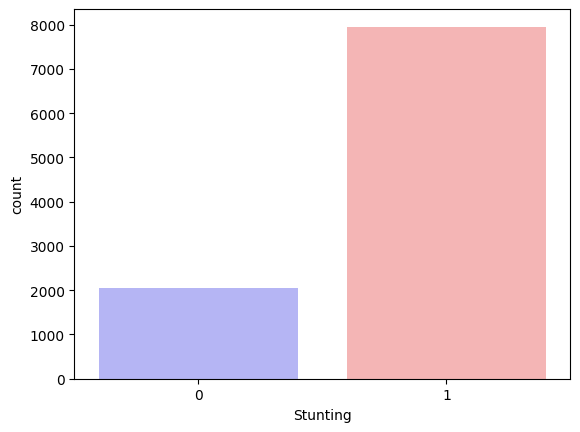

In [ ]:
# Data Exploration
# FOR LABEL
sns.countplot(x="Stunting", data=df_baru, palette="bwr")
plt.show()

In [ ]:
#Checking the Dimension of dataset
df_baru.shape

(10000, 8)

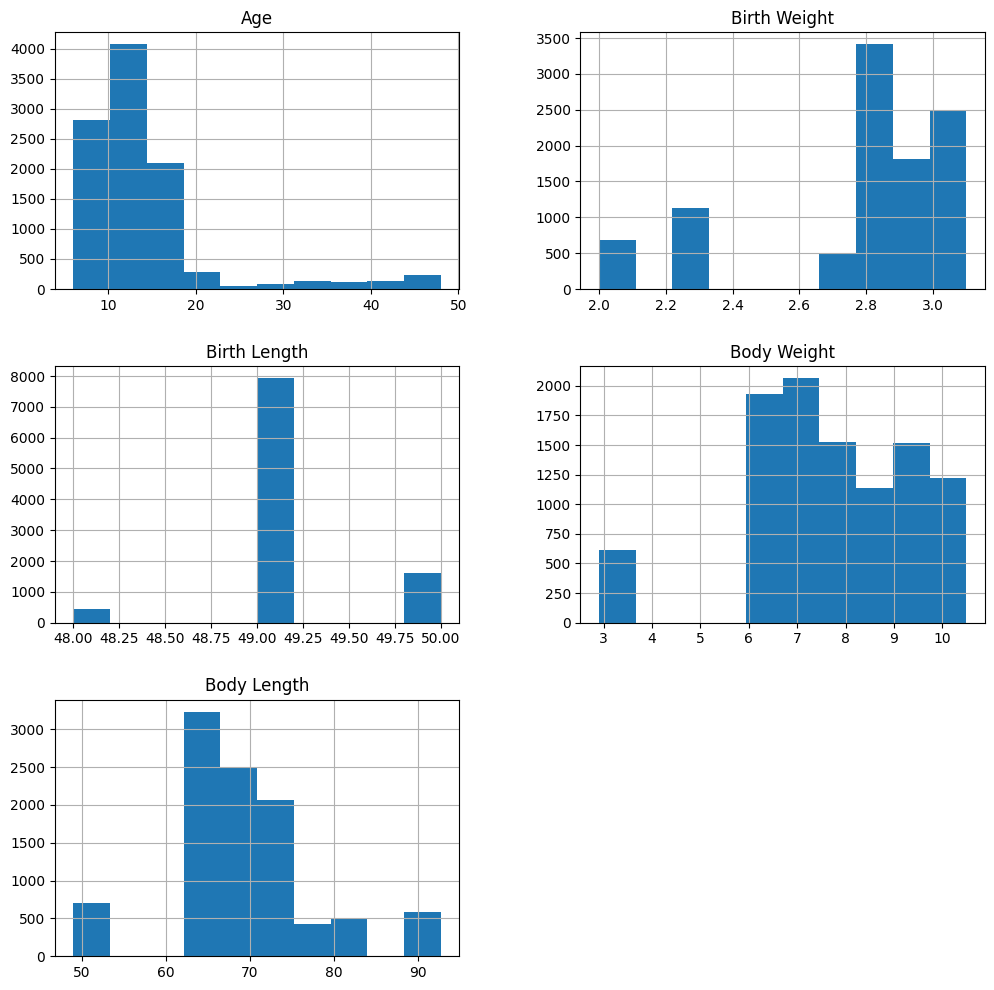

In [ ]:
# HISTOGRAM IN EACH VARIABLE
df_baru.hist(figsize = (12, 12))
plt.show()

In [ ]:
new = df_baru.drop(columns=["Stunting"])
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(new)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=new.columns)

# Save the normalization model using joblib
joblib.dump(scaler, 'normalization_model.joblib')

# Print the normalized DataFrame
print(normalized_df)

      Gender       Age  Birth Weight  Birth Length  Body Weight  Body Length  \
0        0.0  0.261905      0.909091           0.5     0.934211     0.530892   
1        1.0  0.119048      0.818182           0.5     0.000000     0.366133   
2        0.0  0.238095      0.818182           0.5     0.736842     0.530892   
3        0.0  0.595238      0.727273           0.5     0.460526     0.320366   
4        0.0  0.214286      1.000000           0.5     1.000000     0.000000   
...      ...       ...           ...           ...          ...          ...   
9995     0.0  0.214286      0.909091           0.5     0.802632     0.320366   
9996     1.0  0.142857      0.727273           0.0     0.631579     0.320366   
9997     0.0  0.238095      0.727273           0.5     0.631579     0.000000   
9998     0.0  0.190476      0.727273           0.5     0.934211     0.457666   
9999     1.0  0.095238      0.909091           0.5     0.631579     0.709382   

      Breastfeeding  
0               0

In [ ]:
normalized_df.Breastfeeding.value_counts()

Breastfeeding
0.0    10000
Name: count, dtype: int64

In [ ]:
#Data Splitting
# Separating the Feature and Labels
X = normalized_df.drop(columns = 'Breastfeeding')
y = df_baru["Stunting"]

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

In [ ]:
# Periksa apakah ada NaN atau inf
print(np.any(np.isnan(X_train)), np.any(np.isnan(X_test)))
print(np.any(np.isinf(X_train)), np.any(np.isinf(X_test)))

False False
False False


# **Model Architecture**

In [ ]:
# Definisikan model dengan regularisasi dan dropout
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=6, kernel_initializer='normal', kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Kompilasi model dengan optimizer dan metrics tambahan
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/100
63/63 [==============================] - 2s 8ms/step - loss: 0.8199 - accuracy: 0.7343 - val_loss: 0.7851 - val_accuracy: 0.7925
Epoch 2/100
63/63 [==============================] - 0s 5ms/step - loss: 0.7526 - accuracy: 0.7941 - val_loss: 0.6955 - val_accuracy: 0.7925
Epoch 3/100
63/63 [==============================] - 0s 5ms/step - loss: 0.6723 - accuracy: 0.7958 - val_loss: 0.6229 - val_accuracy: 0.7925
Epoch 4/100
63/63 [==============================] - 0s 7ms/step - loss: 0.6316 - accuracy: 0.7960 - val_loss: 0.5955 - val_accuracy: 0.7925
Epoch 5/100
63/63 [==============================] - 0s 7ms/step - loss: 0.6164 - accuracy: 0.7962 - val_loss: 0.5800 - val_accuracy: 0.7925
Epoch 6/100
63/63 [==============================] - 0s 6ms/step - loss: 0.5949 - accuracy: 0.7962 - val_loss: 0.5644 - val_accuracy: 0.7925
Epoch 7/100
63/63 [==============================] - 0s 6ms/step - loss: 0.5827 - accuracy: 0.7962 - val_loss: 0.5507 - val_accuracy: 0.7925
Epoch 8/100
6

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9

In [ ]:
prediction = model.predict(np.array([[1, 11, 1.5, 3.3, 7.5, 70, 0]]))
# Fungsi untuk mengubah hasil prediksi menjadi kalimat "Yes" atau "No"
def predict_result(prediction):
    if prediction == 1:
        return "Yes"
    else:
        return "No"

# Menghasilkan kalimat berdasarkan hasil prediksi
result = predict_result(prediction)

print(result)

1/1 [==============================] - 0s 126ms/step
Yes


In [ ]:
prediction = model.predict(np.array([[1, 10, 2.5, 50, 9, 80, 0]]))
# Fungsi untuk mengubah hasil prediksi menjadi kalimat "Yes" atau "No"
def predict_result(prediction):
    if prediction == 1:
        return "Yes"
    else:
        return "No"

# Menghasilkan kalimat berdasarkan hasil prediksi
result = predict_result(prediction)

print(result)

1/1 [==============================] - 0s 22ms/step
No


In [ ]:
# Build Function for Detection stunting

def detection():
  Name = input("Masukan Nama Anak Anda: ",)
  Gender = int(input("Masukan Jenis Kelamin Anak Anda (0: Laki-laki, 1: Perempuan): ",))
  Age = int(input("Berapa bulan umur anak Anda (bulan):",))
  Birth_Weight = float(input("Berapa berat badan Anak Anda saat lahir (satuan kg): ",))
  Birth_Length = float(input("Berapa tinggi badan Anak Anda saat lahir (satuan cm): ",))
  Body_Weight = float(input("Berapa berat badan Anak Anda saat ini (satuan kg): ",))
  Body_Length = float(input("Berapa tinggi badan Anak Anda saat ini (satuan cm): ",))
  Breastfeeding = int(input("Apakah anak anda mendapatkan ASI (0: Tidak, 1: Ya): ",))

  data = ([Gender, Age, Birth_Weight, Birth_Length, Body_Weight, Body_Length, Breastfeeding]),
  deteksi = model.predict(data)
  print(deteksi)
  print("\n")
  detection_result = deteksi[0]
   # Menggunakan threshold 0.5 sebagai pembatas klasifikasi
  if detection_result > 0.5:
    print(Name + " terdeteksi Stunting")
  else:
    print(Name + " terdeteksi Normal")

detection()

Masukan Nama Anak Anda: Arfi
Masukan Umur Anak Anda (0: Laki-laki, 1: Perempuan): 1
Berapa bulan umur anak Anda (bulan):24
Berapa berat badan Anak Anda saat lahir(satuan kg):12
Berapa tinggi badan Anak Anda saat lahir(satuan cm):70
Berapa berat badan Anak Anda saat ini(satuan kg):14
Berapa tinggi badan Anak Anda saat ini(satuan cm):76
Apakah anak anda mendapatkan ASI (0: Tidak, 1: Ya):1
1/1 [==============================] - 0s 36ms/step
[[1.6504039e-27]]


Arfi terdeteksi Normal


# **Model Evaluation**

63/63 [==============================] - 2s 7ms/step


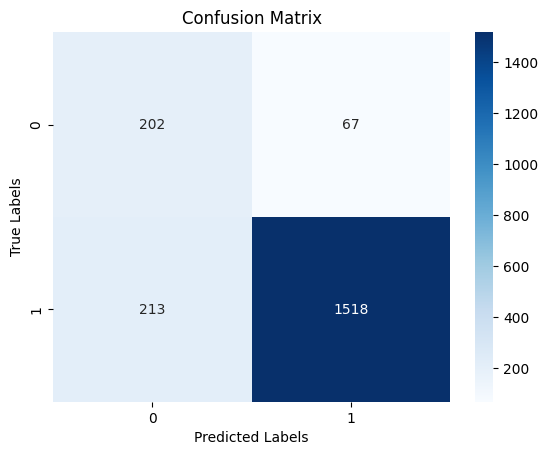

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert continuous variable to binary labels
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

# Create the confusion matrix
confusion = confusion_matrix(y_pred_binary, y_test)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")

# Set the axis labels
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Set the title
plt.title("Confusion Matrix")

# Display the plot
plt.show()

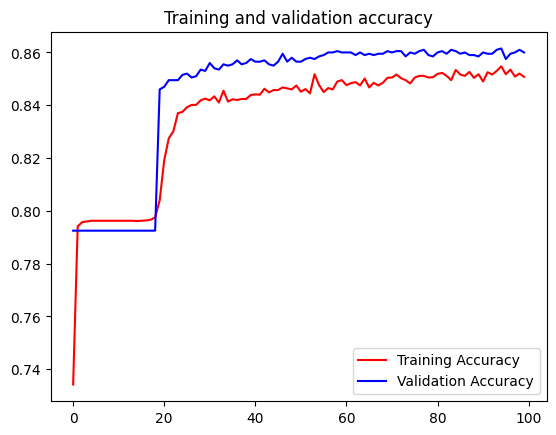

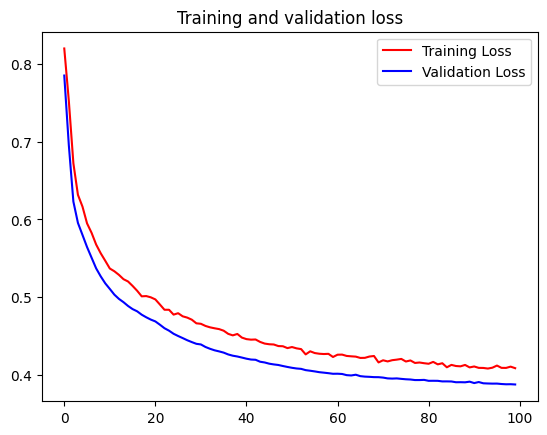

In [ ]:
# Retrieve a list of list results on training and test data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()  # Add legend to the plot
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend()  # Add legend to the plot
plt.show()

In [ ]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Generate classification report
report = classification_report(y_test, y_pred_binary)

# Print the metrics report
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", report)

Precision: 0.8687963491158015
Recall: 0.9608832807570978
F1 Score: 0.9125224685440384
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.45      0.56       415
           1       0.87      0.96      0.91      1585

    accuracy                           0.85      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [ ]:
# Saving model
# Calling `save('my_model.h5')` creates a h5 file `my_model.h5`.
model.save("my_h5_model.h5")

# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("my_h5_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('my_model')